**bear and panda classification**

In [2]:
from google.colab import drive
drive.mount('archive.zip')

Mounted at archive.zip


In [3]:
# prompt: mounting drive

from google.colab import drive
drive.mount('archive.zip')


Drive already mounted at archive.zip; to attempt to forcibly remount, call drive.mount("archive.zip", force_remount=True).


**un-zip the file**

In [4]:
import os

zip_path = "archive.zip"

if os.path.exists(zip_path):
    print(" File found!")
else:
    print(" File not found! Check the path in Google Drive.")


 File found!


In [5]:
# ipython-input-8-541e96ad1e53
from google.colab import drive
drive.mount('/content/drive') # Mount your Google Drive

# ipython-input-10-541e96ad1e53
import os

zip_path = "/content/drive/My Drive/archive.zip"  # Update with your archive's location

if os.path.exists(zip_path):
    print(" File found!")
else:
    print(" File not found! Check the path in Google Drive.")

# ipython-input-13-541e96ad1e53
import zipfile
import os

zip_path = "/content/drive/My Drive/archive.zip"  # Update if needed
extract_path = "/content/dataset"  # Folder to extract files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Dataset extracted successfully!")

Mounted at /content/drive
 File found!
 Dataset extracted successfully!


In [6]:
import tensorflow as tf

img_size = 128  # Image size for resizing
batch_size = 32  # Batch size for training

Train = tf.keras.preprocessing.image_dataset_from_directory(
    extract_path + "/PandasBears/Train",
    shuffle=True,
    image_size=(img_size, img_size)
)

Test = tf.keras.preprocessing.image_dataset_from_directory(
    extract_path + "/PandasBears/Test",
    shuffle=True,
    image_size=(img_size, img_size)
)

print(" Dataset Loaded Successfully!")
print("Classes:", Train.class_names)


Found 500 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
 Dataset Loaded Successfully!
Classes: ['Bears', 'Pandas']


In [15]:

#data_augmentation
import tensorflow as tf

img_size = 128  # Image size for resizing
batch_size = 32  # Batch size for training

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_size, img_size),  # Corrected
    tf.keras.layers.Rescaling(1.0 / 255.0)  #  Corrected
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Corrected
    tf.keras.layers.RandomRotation(0.2)  #  Corrected
])

print(" Preprocessing Layers Defined Successfully!")


 Preprocessing Layers Defined Successfully!


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D

model = Sequential([
    resize_and_rescale,
    data_augmentation,

    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output 2 classes (Panda/Bear)
])

print(" Model Built Successfully!")


 Model Built Successfully!


In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(" Model Compiled Successfully!")


 Model Compiled Successfully!


In [18]:
history = model.fit(
    Train,
    epochs=5,
    batch_size=batch_size,
    validation_data=Test
)

print("Training Complete!")


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5870 - loss: 0.6753 - val_accuracy: 0.9500 - val_loss: 0.2143
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9427 - loss: 0.1640 - val_accuracy: 0.9700 - val_loss: 0.0963
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9714 - loss: 0.0842 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9911 - loss: 0.0241 - val_accuracy: 0.9900 - val_loss: 0.0260
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9961 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 0.0052
Training Complete!


In [19]:
loss, accuracy = model.evaluate(Test)
print(f" Model Accuracy: {accuracy*100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 1.0000 - loss: 0.0071
 Model Accuracy: 100.00%


First Image to Predict:


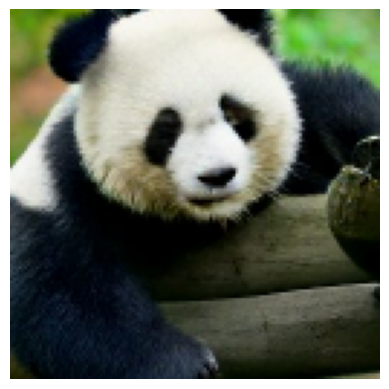

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
 Actual Label: Pandas
 Predicted: Pandas


In [20]:
import numpy as np
import matplotlib.pyplot as plt

for img_batch, labels_batch in Test.take(1):
    first_img = img_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('First Image to Predict:')
    plt.imshow(first_img)
    plt.axis(False)
    plt.show()

    class_names = Train.class_names
    batch_prediction = model.predict(img_batch)

    print(' Actual Label:', class_names[first_label])
    print(' Predicted:', class_names[np.argmax(batch_prediction[0])])
